In [3]:
from ipyleaflet import Map, basemaps, basemap_to_tiles

m = Map(center=(39.3327459, -76.62337004), zoom=9)

dark_matter_layer = basemap_to_tiles(basemaps.NASAGIBS.ModisTerraTrueColorCR)
m.add_layer(dark_matter_layer)
m

Map(center=[39.3327459, -76.62337004], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_tit…

In [13]:
!wget https://archive.stsci.edu/pub/hlsp/angst/acs/hlsp_angst_hst_acs-wfc_10210-ugc9128_f814w_v1_ref.fits -O test.fits

--2020-12-08 00:41:02--  https://archive.stsci.edu/pub/hlsp/angst/acs/hlsp_angst_hst_acs-wfc_10210-ugc9128_f814w_v1_ref.fits
Resolving archive.stsci.edu (archive.stsci.edu)... 130.167.252.39
Connecting to archive.stsci.edu (archive.stsci.edu)|130.167.252.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71418240 (68M) [allicashion/octet-stream]
Saving to: ‘test.fits’

test.fits           100%[===================>]  68.11M  14.2MB/s    in 4.9s    

2020-12-08 00:41:08 (14.0 MB/s) - ‘test.fits’ saved [71418240/71418240]



In [102]:
import requests

res = requests.get('http://127.0.0.1:8000/loadfits/test.fits/0')
res, res.text

(<Response [200]>, '"fits_test.fits_0_1"')

In [106]:
hsh = res.json()
x = 1
y = 3
res2 = requests.get(f'http://127.0.0.1:8000/tile/{hsh}/1/{x}.{y}')
res2

<Response [200]>

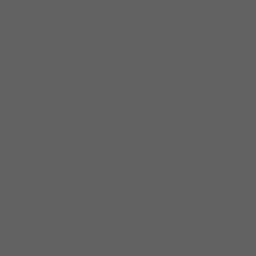

In [107]:
from IPython import display

display.display_png(res2.content, raw=True)

In [95]:
import ipyleaflet

In [108]:
l = ipyleaflet.TileLayer(url='http://127.0.0.1:8000/tile/'+hsh+'/{z}/{x}.{y}')
m = ipyleaflet.Map(layers=[l], crs=ipyleaflet.projections.Simple)
m 

Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…